# 윤동주의 시와 김소월 시의 단어 분포를 비교하시오

In [0]:
# 구글 드라이브와 연결
# from google.colab import auth
# auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
import matplotlib as mpl
import matplotlib.pyplot as plt

# 그래프에서 한글표현을 위해 폰트를 설치합니다.
%config InlineBackend.figure_format = 'retina'   # 폰트가 깨끗하게 보이도록 설정
!apt -qq -y install fonts-nanum > /dev/null      # 나눔 폰트 설치

import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

# 기본 글꼴 변경
import matplotlib as mpl
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumBarunGothic')

In [0]:
# 형태소분석기 관련 설치
!apt-get update
!apt-get install g++ openjdk-8-jdk

!pip install JPype1==0.7.0
!pip install rhinoMorph

In [0]:
# 경로 변경
cd /content/gdrive/My Drive/pytest/

In [0]:
# 데이터 로딩

def read_data(filename, encoding='utf8'):                # 읽기 함수 정의. utf8 인코딩 
  with open(filename, 'r', encoding=encoding) as f:
    data = f.read()
  return data

def write_data(data, filename, encoding='utf8'):         # 쓰기 함수 정의. utf8 인코딩 
  with open(filename, 'w', encoding=encoding) as f:
    f.write(data)

data_kim = read_data('김소월시.txt', encoding='utf8')    # 김소월시 로딩
data_yoon = read_data('윤동주시.txt', encoding='utf8')   # 윤동주시 로딩

In [0]:
print(data_kim)
print(data_yoon)

In [0]:
# 형태소 분석기 시작 
import rhinoMorph
rn = rhinoMorph.startRhino()

In [0]:
# 김소월 데이터 형태소 분석
# 전체 파일 내용을 한번에 형태소 분석한다 
morphed_data_kim = rhinoMorph.onlyMorph_list(rn, data_kim, pos=['NNG', 'NNP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi=True)
print('형태소 분석 결과:', morphed_data_kim)

# 형태소 분석 결과는 리스트 원소이므로 각각을 문자열(str)로 변환한 뒤, 단어 사이에 공백을 두어 모두 결합한다
morphed_data_kim = ' '.join([str(elem) for elem in morphed_data_kim]) 
print('문자열 변환 결과:', morphed_data_kim)

# 형태소 분석된 파일 저장
write_data(morphed_data_kim, 'kim_morphed.txt', encoding='utf8')

In [0]:
# 윤동주 데이터 형태소 분석
morphed_data_yoon = rhinoMorph.onlyMorph_list(rn, data_yoon, pos=['NNG', 'NNP', 'VV', 'VA', 'XR', 'IC', 'MM', 'MAG', 'MAJ'], eomi=True)
print(morphed_data_yoon)

# 형태소 분석 결과는 리스트 원소이므로 각각을 문자열(str)로 변환한 뒤, 단어 사이에 공백을 두어 모두 결합한다
morphed_data_yoon = ' '.join([str(elem) for elem in morphed_data_yoon]) 

# 형태소 분석된 파일 저장
write_data(morphed_data_yoon, 'yoon_morphed.txt', encoding='utf8')

In [0]:
# 기분석된 데이터 로딩
data_kim = read_data('kim_morphed.txt', encoding='utf8')
data_yoon = read_data('yoon_morphed.txt', encoding='utf8')

print('data_kim:', data_kim)
print('data_yoon:', data_yoon)

In [0]:
from collections import Counter
# Counter는 분석 대상이 하나의 리스트 안에 구별된 원소로 있어야 한다

# 김소월 시의 단어 빈도계산 
data_kim_list = data_kim.split(' ')        # 결합된 요소들을 공백 단위로 분리하여 하나의 리스트로 만든다 (str -> list)
wordInfo_kim = Counter(data_kim_list)  	   # 하나의 리스트로 결합된 요소를 카운트한다 (내림차순)
print('wordInfo_kim:', wordInfo_kim)

# 윤동주 시의 단어 빈도계산 
data_yoon_list = data_yoon.split(' ')      # 결합된 요소들을 공백 단위로 분리하여 하나의 리스트로 만든다 (str -> list)
wordInfo_yoon = Counter(data_yoon_list)  	 # 하나의 리스트로 결합된 요소를 카운트한다 (내림차순)
print('wordInfo_yoon:', wordInfo_yoon)

In [0]:
# 키와 값을 내림차순 정렬로 추출 
# 김소월 
sorted_keys_kim = sorted(wordInfo_kim, key=wordInfo_kim.get, reverse=True)
sorted_values_kim = sorted(wordInfo_kim.values(), reverse=True)

print('sorted_keys_kim:', sorted_keys_kim)
print('sorted_values_kim:', sorted_values_kim)

print()

# 윤동주 
sorted_keys_yoon = sorted(wordInfo_yoon, key=wordInfo_yoon.get, reverse=True)
sorted_values_yoon = sorted(wordInfo_yoon.values(), reverse=True)

print('sorted_keys_yoon:', sorted_keys_yoon)
print('sorted_values_yoon:', sorted_values_yoon)

In [0]:
# 빈도를 비율로 변환
# 김소월
sum_values_kim = sum(sorted_values_kim)
print('김소월 단어빈도 총합:', sum_values_kim)

sorted_ratio_kim = [round(value / sum_values_kim, 2) for value in sorted_values_kim]
print('김소월 고빈도 단어    :', sorted_keys_kim)
print('김소월 고빈도 단어비율:', sorted_ratio_kim)

print()

# 윤동주
sum_values_yoon = sum(sorted_values_yoon)
print('윤동주 단어빈도 총합:', sum_values_yoon)

sorted_ratio_yoon = [round(value / sum_values_yoon, 2) for value in sorted_values_yoon]
print('윤동주 고빈도 단어    :', sorted_keys_yoon)
print('윤동주 고빈도 단어비율:', sorted_ratio_yoon)

=== 김소월 단어비율 ===


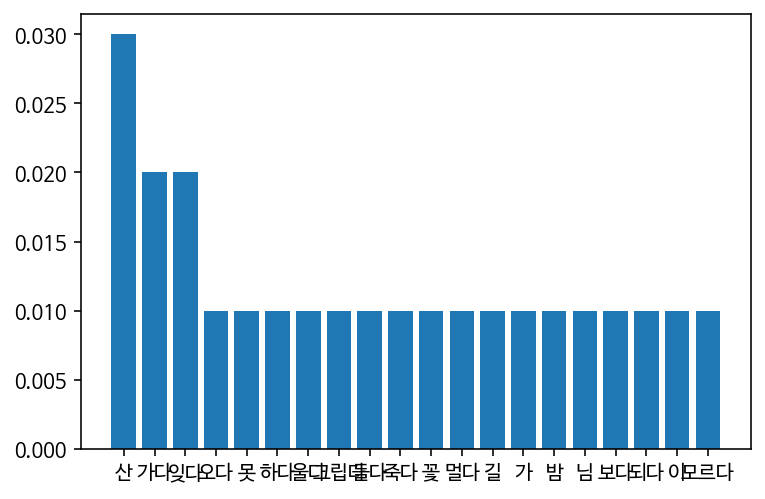

=== 윤동주 단어비율 ===


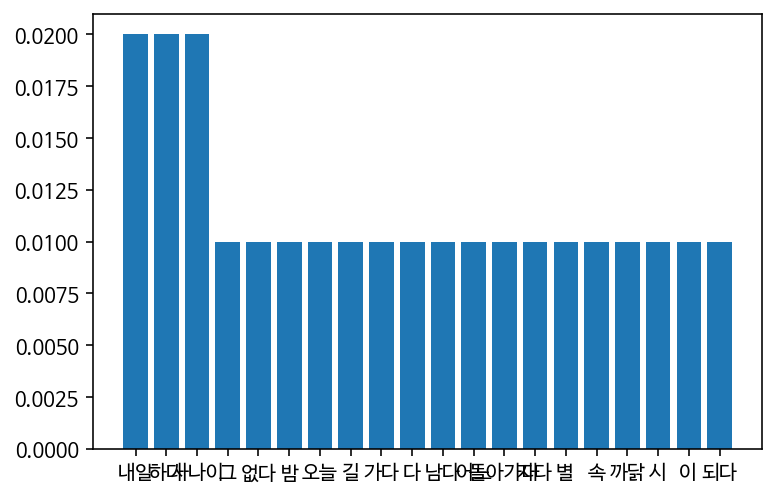

In [0]:
# 막대 그래프로 그림
import matplotlib.pyplot as plt

# 김소월
print('=== 김소월 단어비율 ===')
plt.bar(range(20), sorted_ratio_kim[:20])
plt.xticks(range(20), sorted_keys_kim[:20])
plt.show()

# 윤동주
print('=== 윤동주 단어비율 ===')
plt.bar(range(20), sorted_ratio_yoon[:20])
plt.xticks(range(20), sorted_keys_yoon[:20])
plt.show()